# FIFA 2018 Player Info.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import scipy.stats as stats

In [2]:
df = pd.read_csv('CompleteDataset.csv',dtype='unicode') # I did not allow pandas to identify the Data Type for
############################################################# each insert because it takes up a lot of memory. 
df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
Unnamed: 0             17981 non-null object
Name                   17981 non-null object
Age                    17981 non-null object
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null object
Potential              17981 non-null object
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null object
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-nul

In [4]:
# The DataFrame is using up a lot of memory with useless data such as Player Photo and Club flags
# I will drop these columns in order to have a clear understanding of the Data.
cols = ['Photo','Club Logo','Flag','Unnamed: 0','Club']
df1 = df.drop(columns=cols) #  This is the DF without the useless columns.
print(df1.columns)

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Value', 'Wage',
       'Special', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')


In [5]:
df1.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 70 columns):
Name                   17981 non-null object
Age                    17981 non-null object
Nationality            17981 non-null object
Overall                17981 non-null object
Potential              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null object
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null object
Curve                  17981 non-null object
Dribbling              17981 non-null object
Finishing              17981 non-null object
Free kick accuracy     17981 non-null object
GK diving              17981 non-nul

* **Our info shows that from the Central Attacking Mid-Fielders(CAM) until Special-Teams(ST) except Preferred Positions there are 15952 entries instead of the expected 17981 entries. Let's find out why.**

In [6]:
df1.isnull().sum() # This checks the number of Null/NaN values in the DF Columns.

Name                      0
Age                       0
Nationality               0
Overall                   0
Potential                 0
Value                     0
Wage                      0
Special                   0
Acceleration              0
Aggression                0
Agility                   0
Balance                   0
Ball control              0
Composure                 0
Crossing                  0
Curve                     0
Dribbling                 0
Finishing                 0
Free kick accuracy        0
GK diving                 0
GK handling               0
GK kicking                0
GK positioning            0
GK reflexes               0
Heading accuracy          0
Interceptions             0
Jumping                   0
Long passing              0
Long shots                0
Marking                   0
                       ... 
Vision                    0
Volleys                   0
CAM                    2029
CB                     2029
CDM                 

* **Just as I thought, Most of the position Data is NaN/Null, but at the moment we do not need the positions, so we are going to drop these columns.** 

In [7]:
positions = ['CAM','CB','CDM','CF','CM','ID','LAM','LB','LCB','LCM','LDM','LF','LM','LS','LW','LWB'
             ,'RAM','RB','RCB','RCM','RDM','RF','RM','RS','RW','RWB','ST']
df_pos = df1.drop(columns=positions) # Drop all the position columns.

* **Time to Review, the cleanliness of the Data**

In [8]:
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 43 columns):
Name                   17981 non-null object
Age                    17981 non-null object
Nationality            17981 non-null object
Overall                17981 non-null object
Potential              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null object
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null object
Curve                  17981 non-null object
Dribbling              17981 non-null object
Finishing              17981 non-null object
Free kick accuracy     17981 non-null object
GK diving              17981 non-nul

In [9]:
df_pos.isnull().sum()

Name                   0
Age                    0
Nationality            0
Overall                0
Potential              0
Value                  0
Wage                   0
Special                0
Acceleration           0
Aggression             0
Agility                0
Balance                0
Ball control           0
Composure              0
Crossing               0
Curve                  0
Dribbling              0
Finishing              0
Free kick accuracy     0
GK diving              0
GK handling            0
GK kicking             0
GK positioning         0
GK reflexes            0
Heading accuracy       0
Interceptions          0
Jumping                0
Long passing           0
Long shots             0
Marking                0
Penalties              0
Positioning            0
Reactions              0
Short passing          0
Shot power             0
Sliding tackle         0
Sprint speed           0
Stamina                0
Standing tackle        0
Strength               0


* **Our data is clean, there are no null values in our columns, we still have 17981 entries in our DataFrame.**
* **I'll assign data type of a column later.**

## Data Exploratory.
-----------
* I'll find if there's a correlation between observations.

In [10]:
df = df_pos
df.head(3)

,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,94,€95.5M,€565K,2228,89,63,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,93,€105M,€565K,2154,92,48,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,€123M,€280K,2100,94,56,...,81,80,33,90,78,24,53,80,83,LW


### Age of the Players.

In [11]:
df["Age"] = pd.to_numeric(df['Age'])
Age = np.array(df.Age)
print('Age minimum:',min(Age))
print('Age maximum:',max(Age))

Age minimum: 16
Age maximum: 47


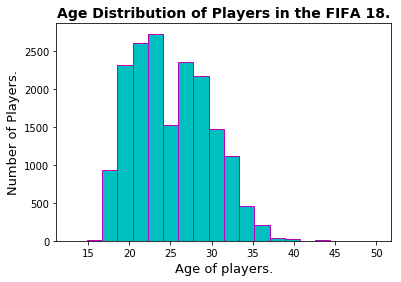

In [12]:
# Plot the Age Data.
fig = plt.hist(Age,bins=20, range=(13, 50), edgecolor="m",color='c')
plt.title('Age Distribution of Players in the FIFA 18.',fontsize=14,fontweight='bold')
plt.xlabel('Age of players.', fontsize=13)
plt.ylabel('Number of Players.', fontsize=13)
plt.show()

* **Seems that there were more plyers that were between 20 and 25 years in the FIFA World Cup.**
--------------
**Player potential and Player Age. **

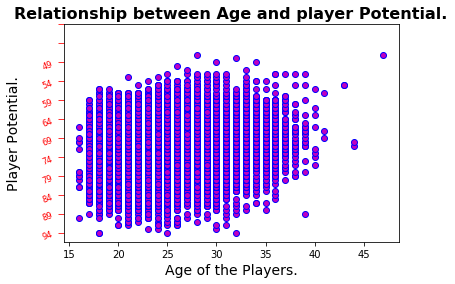

In [13]:
X = np.array(df['Age'])
Y = np.array(df['Potential'])
ax = plt.axes()
fig = plt.scatter(X,Y, c='m',edgecolors='b')
plt.rcParams["figure.figsize"] = (10,6)
ax.tick_params('y',colors='r',length=6,labelsize='small')
plt.ylabel("Player Potential.",labelpad=20, fontsize=14)
plt.yticks(np.arange(0, 60, step=5),rotation=20)
plt.xlabel("Age of the Players.",fontsize=14)
plt.title('Relationship between Age and player Potential.',fontweight='bold',fontsize=16)
plt.show()

* **The Graph above shows that Age and Potential do not have a relationship, thus the graph shows that Potential is independent of Age.**
----------
**Value and Potential.**

In [24]:
# Set The players' value worth and the players' potential into numeric data cause at the moment the data
#is in string format.
value, potential = np.array(df['Value']),np.array(df['Potential'])
new_cash = [] # Initialize empty list for Clean value amount strings.
for c in value: #iterate over the value list
    c = c.replace('€','') #remove the Euro symbol, by replacing it with nothing
    if "M" in c:
        new_cash.append(c.replace('M', '000000').replace('.',''))#replace the M, with actual million 6 zeros,
        ##########################################################remove the full stop, by replacing it with
        ##########################################################nothing
    elif 'K' in c:    #For Thousands
         new_cash.append(c.replace('K', "000")) #replace the 'K' with actual with zeros
    else:
         new_cash.append(c) #every other value without the 'K' or 'M' are okay 

# Change the data types into integers.
cash = [int(i) for i in new_cash]  
potential = [int(i) for i in potential]

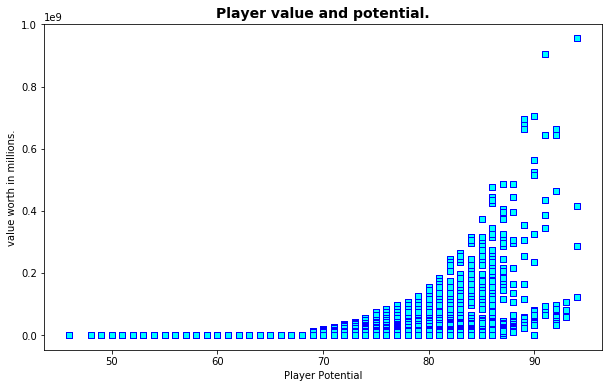

In [26]:
# Plotting our Graph and the line of best fit
plt.scatter(potential, cash,c="cyan",edgecolors='blue',marker='s')#plot scatter plot with cyan square markers. 
plt.xlabel('Player Potential')#x-axis label
plt.ylabel('value worth in millions.')#y-axis label.
plt.title('Player value and potential.', fontsize=14,fontweight='bold')#Graph title with bold font.
plt.show()#show graph.

* **Potential and Salary Observation.**
-----------
- From the graph it is obvious that The players potential and the players value have a relation, but there relation is **NOT Linear**, The relationship between the player's potential and the value is almost exponential.
-------------
- From the graph I also note that we can actually predict a Player's maximum value according to their Potential.
-----------
- It is pretty clear that both Player's potential and value is Directly propotional
___________
-----------

In [28]:
wages = np.array(df['Wage'])
salary = []
for c in wages: #iterate over the wages list
    c = c.replace('€','') #remove the Euro symbol, by replacing it with nothing
    if "M" in c:
        salary.append(c.replace('M', '000000').replace('.',''))#replace the M, with actual million 6 zeros,
        ##########################################################remove the full stop, by replacing it with
        ##########################################################nothing
    elif 'K' in c:    #For Thousands
        salary.append(c.replace('K', "000")) #replace the 'K' with actual with zeros
    else:
        salary.append(c)
# change wage dtype to integers
wages = [int(i) for i in salary]

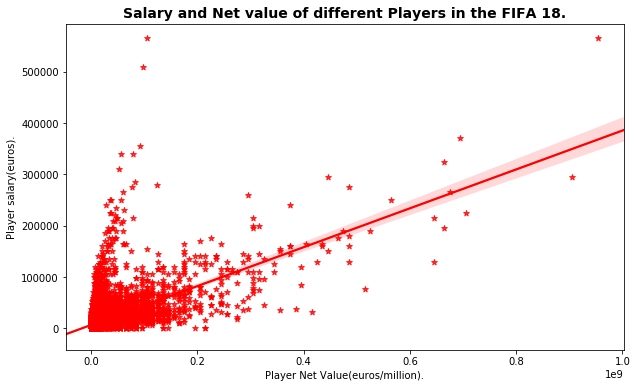

In [29]:
x, y = cash, wages #Initialize our X And Y data.
x, y = pd.Series(x, name="Player Net Value(euros/million)."), pd.Series(y, name="Player salary(euros).")#Plot data and
ax = sb.regplot(x=x, y=y, marker="*", color='r')
plt.title('Salary and Net value of different Players in the FIFA 18.', fontweight='bold',fontsize=14)
plt.show()

In [43]:
# Judging from the cluster it is fair to measure the spread of the data. 
# in order to see the central tendency.
# IQ of the Salary
print("Interquartile range of salary:",stats.iqr(y)) # Calculate the interquantile range for salary 
print("Range of salary:",(np.max(y))-(np.min(y))) # Calculate the range of the salaries
print("salary mean and median respectively:",round(np.mean(y),2))
print("salary median:",np.median(y))
print("salary minimum:",np.min(y))
print("salary maximum:",np.max(y))

Interquartile range of salary: 10000.0
Range of salary: 565000
salary mean and median respectively: 11546.97
salary median: 4000.0
salary minimum: 0
salary maximum: 565000


* **Players' Salary and Net worth observation.**
---------------
- There seems to be a relationship between salary and net worth of the FIFA 18 players, When the player has a high net value the Player's salary will be high.
--------------
------------
- There is a major cluster in the bottom left of our graph, this cluster tells us that most of our players with a small Net value earn a very small amount of salary. To support this the median of the salary is 
--------------
----------